In [1]:
# REMEMBER TO RESTART KERNEL BEFORE RUNNING THIS NOTEBOOK #



#---------------------------------------------------------#

# execute all the exploring printing?
print_all_the_stuff = False

# save figures to .png when running notebook?
save_fig_again = False


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

with open('arbejdsmarkedsanalyse_brancher.csv', 'r') as file: 
    brancher_df= pd.read_csv(file, delimiter = ';')
    
# basic info
if print_all_the_stuff:
    print(brancher_df.info())
    print(brancher_df.head(3))
    
# rename used categoris 
top = 'Topic Label'
ques = 'Question Label'
spm = 'Ordforklaring'
score = 'Score'
group = 'Group'
unit = 'Akse'
id_score = 'Score (Indekseret score)'

In [3]:
# remove empty/non-important coloumns
df = brancher_df.drop(['Kategori12', 'Kategori13', 'Kategori14','Kategori15'],axis=1)

###################################
# decimal numbers are represented with comma instead of point (Danish style); need to convert for python to read as floats
###################################

# checking non-strings before converting to readable decimal points
if print_all_the_stuff:
    for x in df[score]:
        try:
            x.replace(',','.')
        except AttributeError:
            print(x)

# convert to readable decimal points
df[score]=[float(str(x).replace(',','.')) for x in df['Score'] ]

# checking non-strings before converting to readable decimal points
if print_all_the_stuff:
    for x in df[id_score]:
        try:
            x.replace(',','.')
        except AttributeError:
            print(x)
        
# convert to readable decimal points        
df[id_score]=[float(str(x).replace(',','.')) for x in df[id_score] ]

if print_all_the_stuff:
    print(df[score].head(30))
    print(df[id_score].head(30))

In [4]:
# brancher
if print_all_the_stuff:
    df[group].unique()

In [5]:
arb_evne = df[df[top] == 'Arbejdsevne'].groupby([group, ques])[id_score].mean()

In [6]:
if print_all_the_stuff:
    print(arb_evne[0:75])
    print(arb_evne[75:150])
    print(arb_evne[150:])

In [7]:
# just making sure they haven't changed their mind about high score being good
df[df[top] == 'Arbejdsevne']['Hoej Score Godt'].unique()

array([1], dtype=int64)

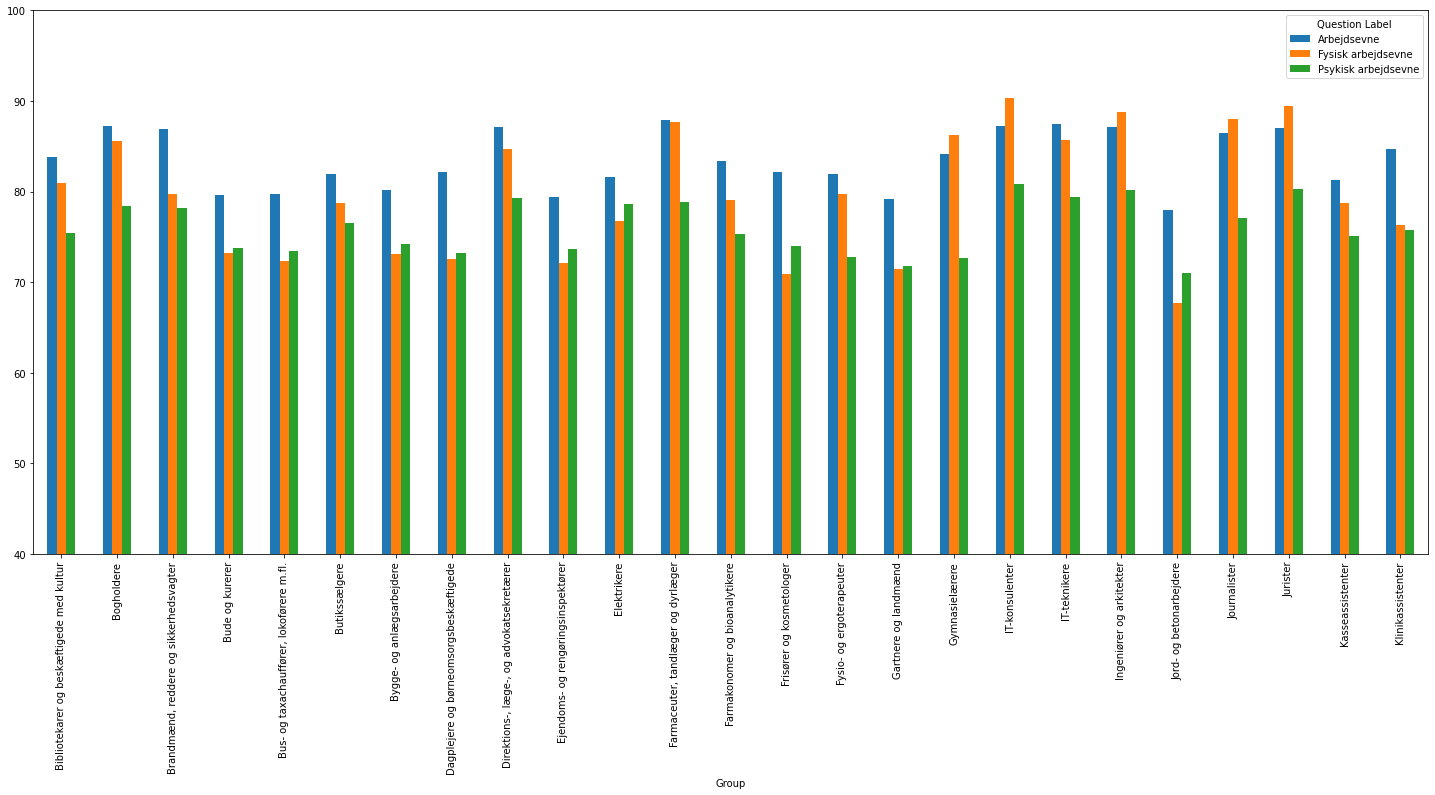

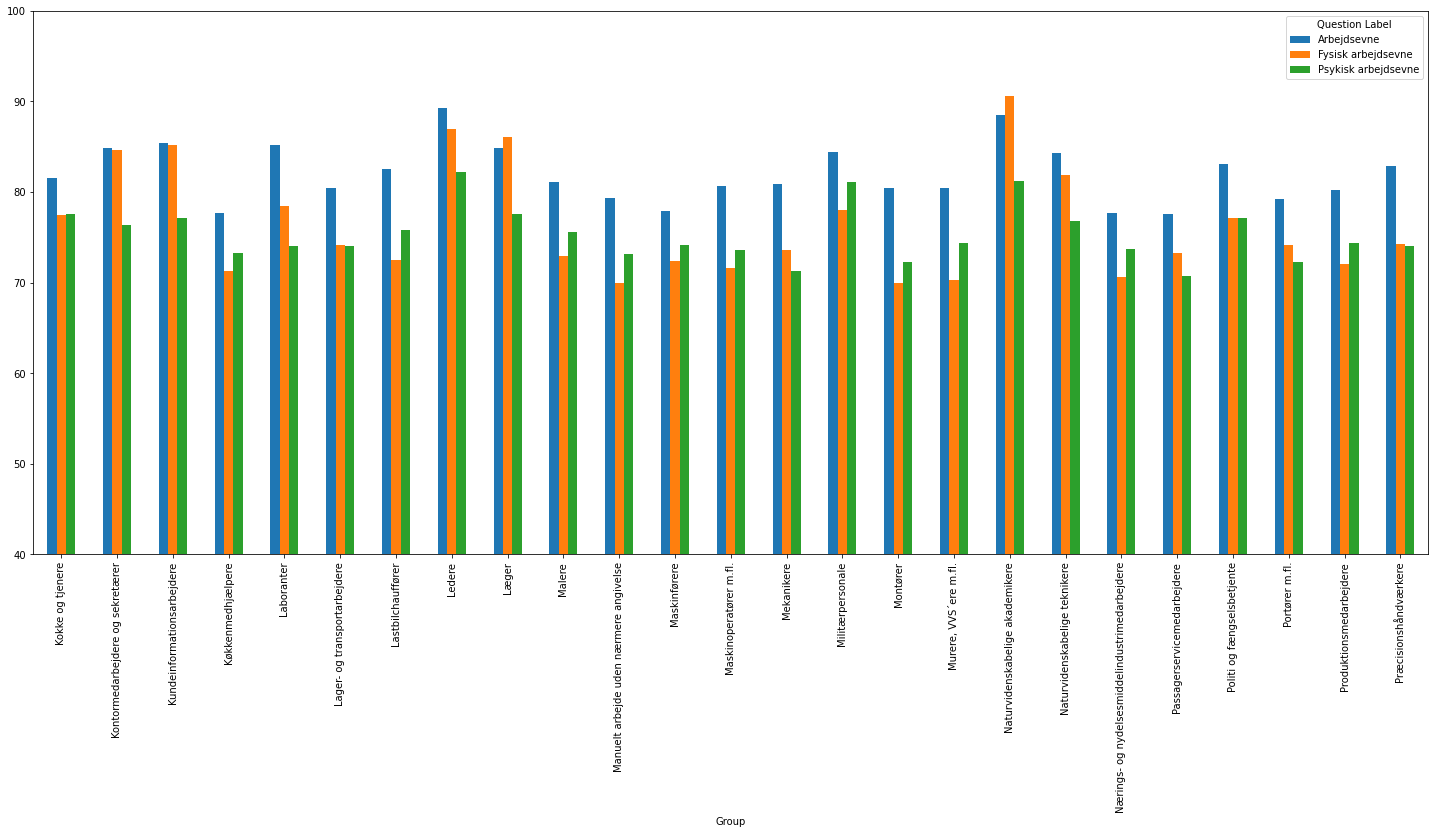

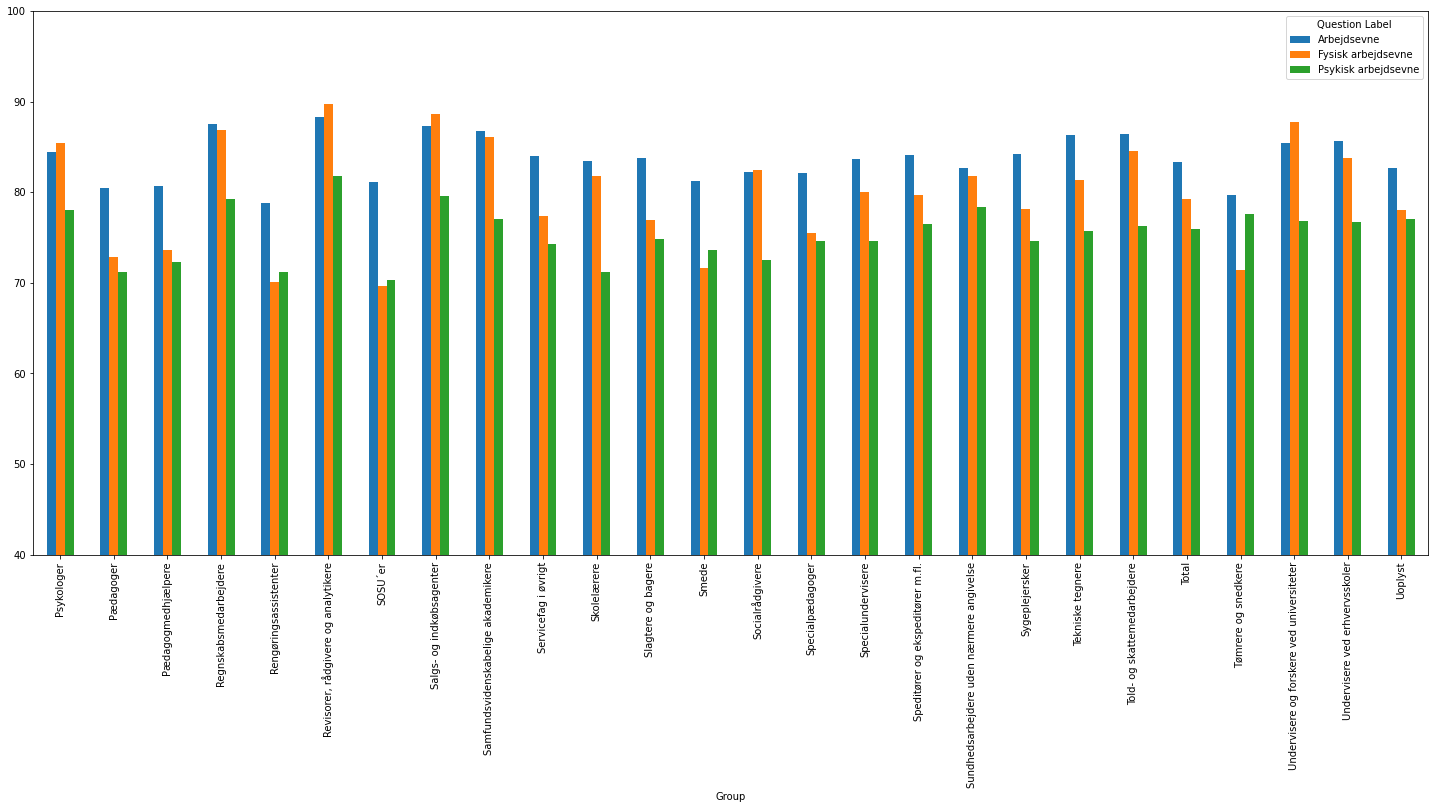

In [8]:
# splitter figur i 3 for overskuelighed
fig3 = arb_evne[0:75].groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(25,10), rot=90).get_figure()
fig4 = arb_evne[75:150].groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(25,10), rot=90).get_figure()
fig5 = arb_evne[150:].groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(25,10), rot=90).get_figure()

In [9]:
# saving figures
if save_fig_again:
    fig3.savefig('fig3.png')
    fig4.savefig('fig4.png')
    fig5.savefig('fig5.png')

In [10]:
# helbred, fysisk og mentalt


helbred = df[df[top] == 'Helbred'].groupby([group, ques])[id_score].mean()
mentalt_helbred = df[df[top] == 'Mentalt helbred'].groupby([group, ques])[id_score].mean()

helbred_tot = df[(df[top] == 'Helbred')  | (df[top] == 'Mentalt helbred')].groupby([group,ques])[id_score].mean()


if print_all_the_stuff:
    fig6 = helbred_tot[0:75].groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(15,10), rot=90).get_figure()
    fig7 = helbred_tot[75:150].groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(15,10), rot=90).get_figure()
    fig8 = helbred_tot[150:].groupby([ques, group]).mean().unstack(0).plot.bar(ylim=(40,100),figsize=(15,10), rot=90).get_figure()

In [11]:
# korrelationer med hårdt fysisk arbejde

hardwork = np.array(df[df[top]=='Fysisk hårdt arbejde'].groupby(group)[id_score].mean())
fys = np.array(df[df[ques]=='Fysisk arbejdsevne' ].groupby([ques,group])[id_score].mean())
psyk = np.array(df[df[ques]=='Psykisk arbejdsevne' ].groupby([ques,group])[id_score].mean())
ment = np.array(df[df[ques]=='Mental sundhed' ].groupby([group])[id_score].mean())


print(np.corrcoef(hardwork, psyk))
print(np.corrcoef(hardwork, fys))
print(np.corrcoef(hardwork, ment))
print(np.corrcoef(psyk, fys))
print(np.corrcoef(ment,psyk))



[[ 1.         -0.59336147]
 [-0.59336147  1.        ]]
[[ 1.         -0.91389913]
 [-0.91389913  1.        ]]
[[ 1.         -0.21386866]
 [-0.21386866  1.        ]]
[[1.         0.74136798]
 [0.74136798 1.        ]]
[[1.         0.42989498]
 [0.42989498 1.        ]]


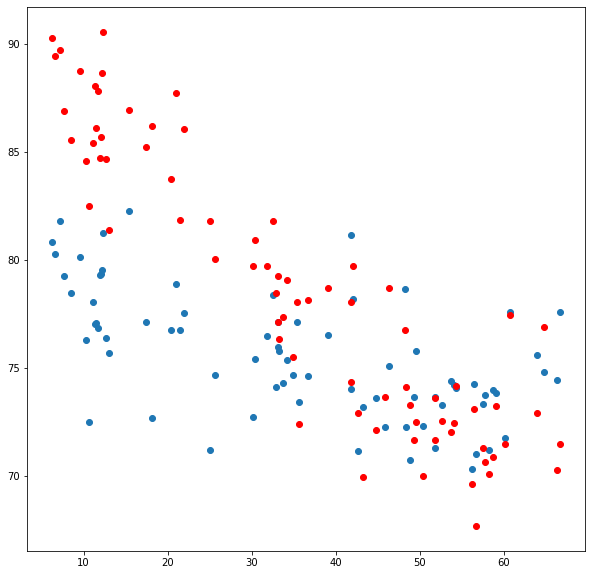

In [12]:
# scatterplot
figa = plt.figure(figsize=(10,10))
plt.scatter(hardwork, psyk)
plt.scatter(hardwork,fys,color='red')

if save_fig_again:
    # husk labels og legends!
    figa.savefig('figa.png')

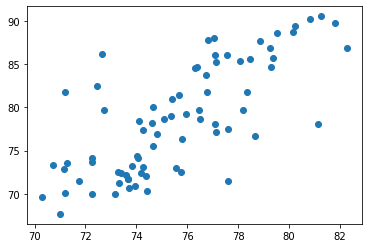

In [13]:
plt.scatter(psyk, fys)

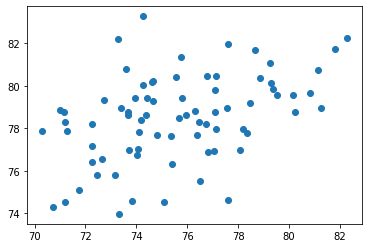

In [14]:
plt.scatter(psyk, ment)